# Полезные ссылки:

1)[Essence of Taylor Series](https://www.youtube.com/watch?v=3d6DsjIBzJ4)

2)[Numerical differentiation](https://en.wikipedia.org/wiki/Numerical_differentiation)

3)[SciPy Derivative Docs](https://github.com/scipy/scipy/blob/v1.3.2/scipy/misc/common.py#L50-L120)


In [17]:
# Classic import:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.misc import derivative
%matplotlib inline

In [20]:
from IPython.display import HTML
HTML('<img src="https://upload.wikimedia.org/wikipedia/commons/6/62/Exp_series.gif">')

# Taylor series 
#### is a representation of a function as an infinite sum of terms that are calculated from the values of the function's derivatives at a single point.

**The Taylor series** of a real or complex-valued function f (x) that is infinitely differentiable at a real or complex number a is the power series

\begin{align*}f\left( x_0 \right) + f'\left( x_0 \right)\left( {x - x_0} \right) + \frac{{f''\left( x_0 \right)}}{{2!}}{\left( {x - x_0} \right)^2} + \frac{{f'''\left( x_0 \right)}}{{3!}}{\left( {x - x_0} \right)^3} + \cdots \end{align*}

where n! denotes the factorial of n and f(n)(x0) denotes the nth derivative of f evaluated at the point x0. In the more compact sigma notation, this can be written as

\begin{align*}f\left( x \right) & = \sum\limits_{i = 0}^\infty {\frac{{{f^{\left( i \right)}}\left( x_0 \right)}}{{i!}}{{\left( {x - x_0} \right)}^i}}\end{align*}

In [224]:
#Precalculation of factorials (factorials[i] = i!)
factorials = [1] * 100
for i in range(1, 100):
    factorials[i] = factorials[i-1] * (i + 1)
factorials.insert(0,1)


def Taylor(f, n = 3, x0 = 0, x_lim = 5):
    '''
    Function which given a function "f" plots 2 graphs:
        1) Function itself
        2) It's Taylor series funtion
    Parameters
    ----------
    f : function
    
    n : nth degree polynomial
    
    x0 : point of approximation
        
    x_lim : limits of plotted figure
    '''
    
    a = x0 - x_lim
    b = x0 + x_lim
    n_points = int((b-a)*10)

    x = np.linspace(a, b, n_points) 
         
        
    taylor = np.ones(n_points) * x0
    for i in range(n):
        order = n + i + ((n + i) % 2 == 0)
        taylor += (derivative(f, x0, n = i, order = order) / factorials[i]) * (x - x0)**i 


 
    plt.figure(figsize=(9,6))
    axes = plt.gca()
    axes.set_ylim([min(f(x))-2, max(f(x))+2]) 
    
    plt.plot(x, f(x), label = 'f(x)') 
    plt.plot(x, taylor, color='r', label ='Taylor Series (n = {})'.format(n)) 
    plt.legend(loc='upper right', fontsize ='large')
    plt.show()

**Примеры:**

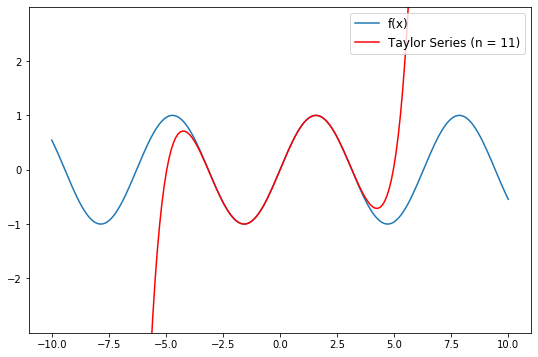

In [243]:
Taylor(np.sin, n = 11, x0=0, x_lim = 10)

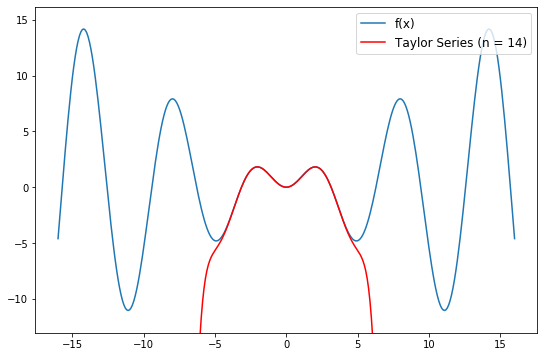

In [245]:
Taylor(lambda x: x*np.sin(x), n = 14, x_lim = 16)

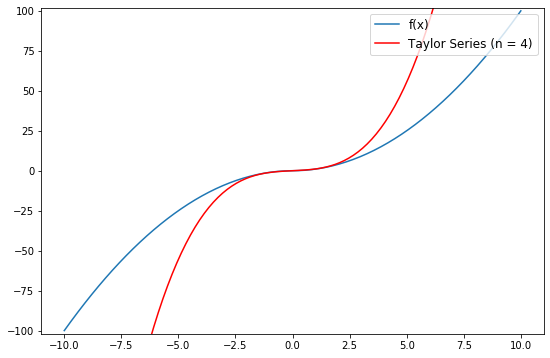

In [256]:
Taylor(lambda x : abs(x)*x, n = 4, x_lim = 10)

As the degree of the Taylor polynomial rises, it approaches the correct function. This image shows sin x and its Taylor approximations, polynomials of degree 1, 3, 5, 7, 9, 11 and 13.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Sintay_SVG.svg/1024px-Sintay_SVG.svg.png" alt="Drawing" style="width: 420px;"/>

# Почему наивное численное дифференцирование через определение производной не работает:

![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/9315f1516ee5847107808697e43693d91abfc6e8)

In [306]:
def numerical_derivative(f, x):
    dx = 1e-4
    return (f(x+dx) - f(x - dx))/2*dx

![image.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/d3eaca68b11f6b3c33841b6f28059f5828f8ae58)

In [304]:
def numerical_derivative_n(f, n, x): 
    h = 1e-30
    result = 0
    for k in range(n):
        if (k + n) % 2 == 0:
            coef = 1
        else:
            coef = -1
        
        binom = factorials[n] / (factorials[k] * factorials[n-k])
        result += coef * binom * f(x + k*h) / h
      

    
    return result

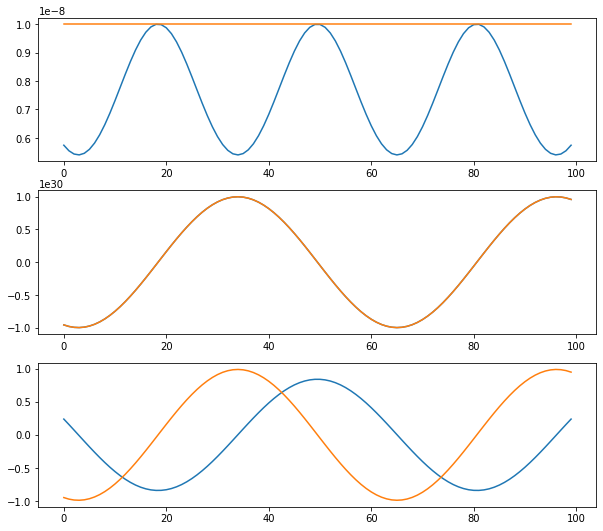

In [309]:
def plot_derivatives(f, n, rng = 5):
    a = -rng
    b = rng
    n_points = (b-a)*10
    x = np.linspace(a, b, n_points)
    dydx1 = f(x)
    
    fig, ax = plt.subplots(3, 1, figsize=(10,9))
    
    for i in range(1, n+1):
        
        dydx1 = numerical_derivative(f, dydx1)
        dydx2 = numerical_derivative_n(f, i, x)
        order = n + i + ((n + i) % 2 == 0)
        dydx3 = derivative(f, x, n = i, order = order)
        ax[0].plot(dydx1)
        ax[1].plot(dydx2)
        ax[2].plot(dydx3)
    plt.show()
        
plot_derivatives(np.sin, 2)

In [13]:
def central_diff_weights(Np, ndiv=1):
    """
    Return weights for an Np-point central derivative.
    Assumes equally-spaced function points.
    If weights are in the vector w, then
    derivative is w[0] * f(x-ho*dx) + ... + w[-1] * f(x+h0*dx)
    Parameters
    ----------
    Np : int
        Number of points for the central derivative.
    ndiv : int, optional
        Number of divisions.  Default is 1.
    Notes
    -----
    Can be inaccurate for large number of points.
    """
    if Np < ndiv + 1:
        raise ValueError("Number of points must be at least the derivative order + 1.")
    if Np % 2 == 0:
        raise ValueError("The number of points must be odd.")
    from scipy import linalg
    ho = Np >> 1
    x = arange(-ho,ho+1.0)
    x = x[:,newaxis]
    X = x**0.0
    for k in range(1,Np):
        X = hstack([X,x**k])
    w = prod(arange(1,ndiv+1),axis=0)*linalg.inv(X)[ndiv]
    return w

def derivative(func, x0, dx=1.0, n=1, args=(), order=3):
    """
    Find the n-th derivative of a function at a point.
    Given a function, use a central difference formula with spacing `dx` to
    compute the `n`-th derivative at `x0`.
    Parameters
    ----------
    func : function
        Input function.
    x0 : float
        The point at which `n`-th derivative is found.
    dx : float, optional
        Spacing.
    n : int, optional
        Order of the derivative. Default is 1.
    args : tuple, optional
        Arguments
    order : int, optional
        Number of points to use, must be odd.
    Notes
    -----
    Decreasing the step size too small can result in round-off error.
    Examples

    """
    if order < n + 1:
        raise ValueError("'order' (the number of points used to compute the derivative), "
                         "must be at least the derivative order 'n' + 1.")
    if order % 2 == 0:
        raise ValueError("'order' (the number of points used to compute the derivative) "
                         "must be odd.")

    weights = central_diff_weights(order, n)
    val = 0.0
    ho = order >> 1
    for k in range(order):
        val += weights[k]*func(x0+(k-ho)*dx,*args)
    return val / prod((dx,)*n,axis=0)